# **Scikit-learn (sklearn) Modeling**


* 0. An end-to-end Scikit learn workflow
* 1. Getting the data ready
* 2. Choose the right estimator(model)/alogrithm for our problems
* 3. Fit the model/algorithm and use it to make predictions on our data
* 4. Evaluating a model
* 5. Imrove a model
* 6. Save and load a trained model
* 7. Putting it all together



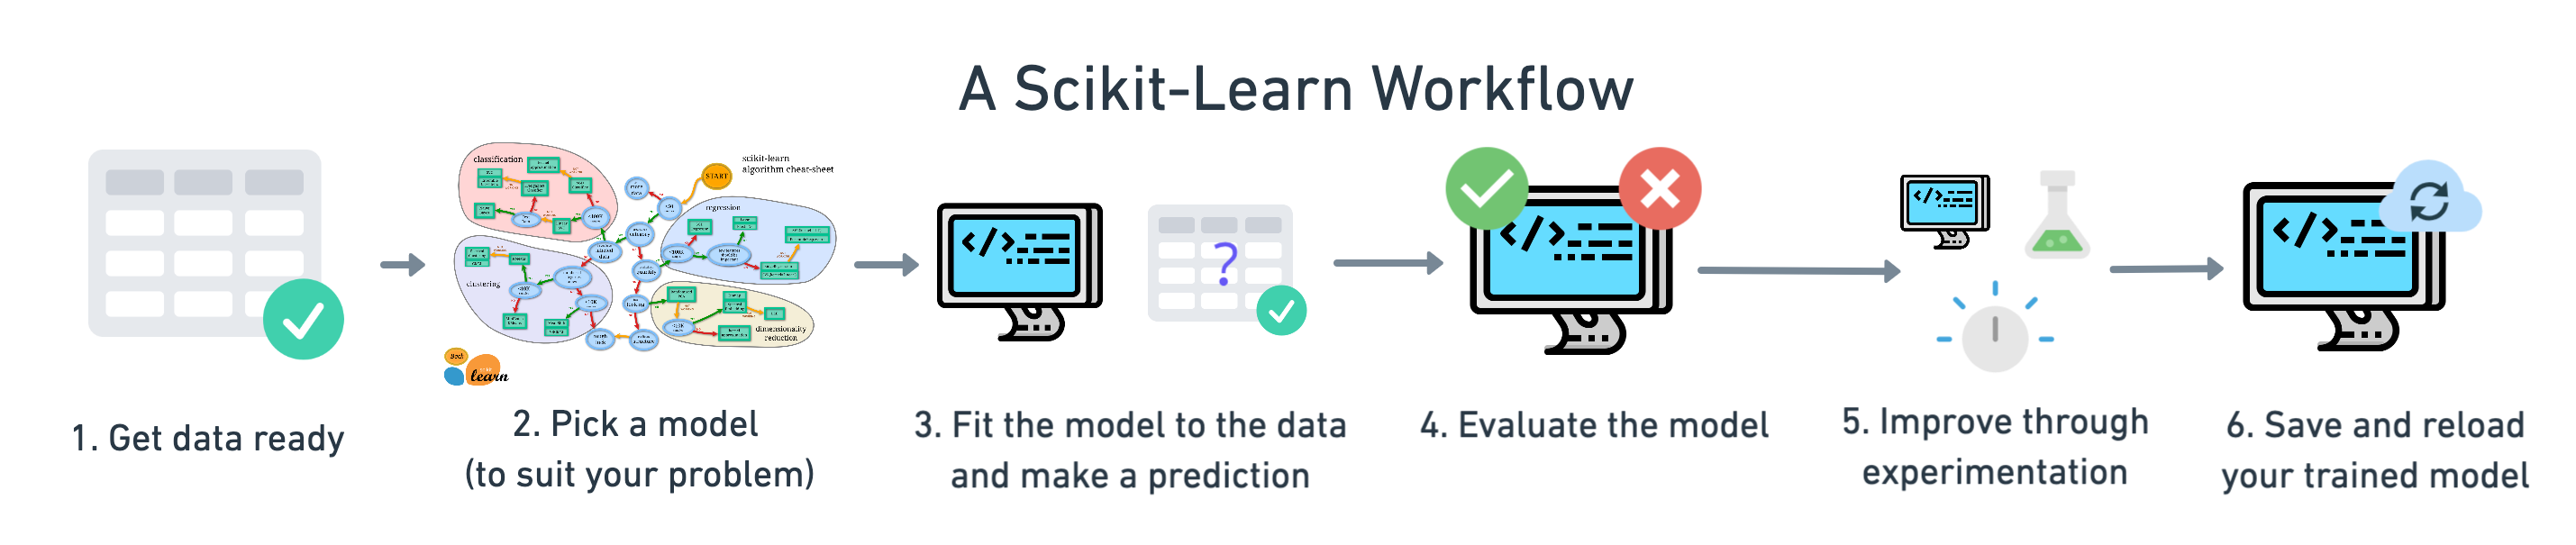

# **0. An end-to-enh Scikit learn worklflow**

In [1]:
#1. Get the data ready
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [2]:
heart_diesease = pd.read_csv("/content/drive/MyDrive/machine_learning/data/heart-disease.csv")
heart_diesease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [3]:
 #Make Matrices one with the features and one with the goal
 X = heart_diesease.drop("target",axis=1)

#Create y labels
 Y = heart_diesease['target']

2.Choose the model and hyperparameters(in the heart disease example we need a classification model)

In [4]:
from sklearn.ensemble import RandomForestClassifier
#classifier
clf = RandomForestClassifier()
#We will keep the deafualt hyperparameters
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

3.Fit the model to the training data


In [5]:
from sklearn.model_selection import train_test_split
X_train , X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.2)
#test size 0.2 means 20% of data will be used for the test data and 80% for the training data


In [6]:
clf.fit(X_train,Y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [7]:
X_train

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
99,53,1,2,130,246,1,0,173,0,0.0,2,3,2
6,56,0,1,140,294,0,0,153,0,1.3,1,0,2
276,58,1,0,146,218,0,1,105,0,2.0,1,1,3
220,63,0,0,150,407,0,0,154,0,4.0,1,3,3
180,55,1,0,132,353,0,1,132,1,1.2,1,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...
59,57,0,0,128,303,0,0,159,0,0.0,2,1,2
96,62,0,0,140,394,0,0,157,0,1.2,1,0,2
100,42,1,3,148,244,0,0,178,0,0.8,2,2,2
49,53,0,0,138,234,0,0,160,0,0.0,2,0,2


In [8]:
#Make a prediction
#Y_label = clf.predict(np.array([0,2,3,4]))
#in order to work data need to be same size and same as the x train data

In [9]:
y_preds = clf.predict(X_test)
y_preds

array([1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0])

In [10]:
Y_test

235    0
299    0
66     1
45     1
204    0
      ..
288    0
136    1
262    0
302    0
178    0
Name: target, Length: 61, dtype: int64

In [11]:
#Evaluate the model on training data and test data
clf.score(X_train,Y_train)

1.0

In [12]:
clf.score(X_test,Y_test)

0.7377049180327869

In [13]:
from sklearn.metrics import  classification_report,confusion_matrix,accuracy_score


print(classification_report(Y_test,y_preds))

              precision    recall  f1-score   support

           0       0.84      0.64      0.72        33
           1       0.67      0.86      0.75        28

    accuracy                           0.74        61
   macro avg       0.75      0.75      0.74        61
weighted avg       0.76      0.74      0.74        61



In [14]:
confusion_matrix(Y_test,y_preds)

array([[21, 12],
       [ 4, 24]])

In [15]:
accuracy_score(Y_test,y_preds)

0.7377049180327869

In [16]:
#5 Impore a model
#Try different amount of n_estimators

np.random.seed(42)
for i in range (10,100,10):
  print(f'Trying model with {i} estimators')
  clf = RandomForestClassifier(n_estimators=i).fit(X_train,Y_train)
  print(f'Model accuary on test set:{clf.score(X_test,Y_test) * 100:.2f} % ')
  print("")

Trying model with 10 estimators
Model accuary on test set:72.13 % 

Trying model with 20 estimators
Model accuary on test set:72.13 % 

Trying model with 30 estimators
Model accuary on test set:77.05 % 

Trying model with 40 estimators
Model accuary on test set:73.77 % 

Trying model with 50 estimators
Model accuary on test set:77.05 % 

Trying model with 60 estimators
Model accuary on test set:77.05 % 

Trying model with 70 estimators
Model accuary on test set:78.69 % 

Trying model with 80 estimators
Model accuary on test set:77.05 % 

Trying model with 90 estimators
Model accuary on test set:72.13 % 



In [17]:
#6 Save a model and load it
import pickle
pickle.dump(clf,open('/content/drive/MyDrive/machine_learning/pkl_models/random_forest_model.pkl','wb'))

In [18]:
loaded_model = pickle.load(open("/content/drive/MyDrive/machine_learning/pkl_models/random_forest_model.pkl","rb"))
loaded_model.score(X_test,Y_test)


0.7213114754098361

In [19]:
import sklearn
sklearn.show_versions()


System:
    python: 3.6.9 (default, Oct  8 2020, 12:12:24)  [GCC 8.4.0]
executable: /usr/bin/python3
   machine: Linux-4.19.112+-x86_64-with-Ubuntu-18.04-bionic

Python dependencies:
       pip: 19.3.1
setuptools: 51.3.3
   sklearn: 0.22.2.post1
     numpy: 1.19.5
     scipy: 1.4.1
    Cython: 0.29.21
    pandas: 1.1.5
matplotlib: 3.2.2
    joblib: 1.0.0

Built with OpenMP: True


# **3.Getting the data ready to be used with machine learnign**
  Three main things we have to do


1.   Split the data into features and  labels (usually x and y)
2.   Filling (also called imputing) or disregarding missing values
3. Converint non-numerical values to numerical (also called feature encoding) 


In [20]:
heart_diesease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [21]:
X = heart_diesease.drop('target',axis=1)
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [22]:
Y = heart_diesease['target']
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

In [23]:
#Splitting the data into training and test sets
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

In [24]:
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((242, 13), (61, 13), (242,), (61,))

# **3**

1. 1 Make sure all data is numerical

In [25]:
car_sales = pd.read_csv('/content/drive/MyDrive/machine_learning/data/car-sales-extended.csv')
car_sales

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431,4,15323
1,BMW,Blue,192714,5,19943
2,Honda,White,84714,4,28343
3,Toyota,White,154365,4,13434
4,Nissan,Blue,181577,3,14043
...,...,...,...,...,...
995,Toyota,Black,35820,4,32042
996,Nissan,White,155144,3,5716
997,Nissan,Blue,66604,4,31570
998,Honda,White,215883,4,4001


In [26]:
car_sales.dtypes

Make             object
Colour           object
Odometer (KM)     int64
Doors             int64
Price             int64
dtype: object

In [27]:
#Split the data into training and testing (X, Y)
X = car_sales.drop('Price',axis=1)
Y = car_sales['Price']

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

In [28]:
#Build machine learning model
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
#model.fit(X_train,Y_train)
#model.score(X_test,Y_test)
# DOES NOT WORK since make and colour ar not numeric values

In [29]:
#Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make","Colour","Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot',
                                   one_hot,
                                   categorical_features )],
                                   remainder="passthrough")

transformed_X = transformer.fit_transform(X)
transformed_X

array([[0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 3.54310e+04],
       [1.00000e+00, 0.00000e+00, 0.00000e+00, ..., 0.00000e+00,
        1.00000e+00, 1.92714e+05],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 8.47140e+04],
       ...,
       [0.00000e+00, 0.00000e+00, 1.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 6.66040e+04],
       [0.00000e+00, 1.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.15883e+05],
       [0.00000e+00, 0.00000e+00, 0.00000e+00, ..., 1.00000e+00,
        0.00000e+00, 2.48360e+05]])

In [30]:
pd.DataFrame(transformed_X)

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,35431.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,192714.0
2,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,84714.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,154365.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,181577.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,35820.0
996,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,155144.0
997,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,66604.0
998,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,215883.0


In [31]:
dummies = pd.get_dummies(car_sales[['Make','Colour','Doors']])
dummies

,Doors,Make_BMW,Make_Honda,Make_Nissan,Make_Toyota,Colour_Black,Colour_Blue,Colour_Green,Colour_Red,Colour_White
0,4,0,1,0,0,0,0,0,0,1
1,5,1,0,0,0,0,1,0,0,0
2,4,0,1,0,0,0,0,0,0,1
3,4,0,0,0,1,0,0,0,0,1
4,3,0,0,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...
995,4,0,0,0,1,1,0,0,0,0
996,3,0,0,1,0,0,0,0,0,1
997,4,0,0,1,0,0,1,0,0,0
998,4,0,1,0,0,0,0,0,0,1


In [32]:
#Lets refit the model
np.random.seed(42)
X_train,X_test,Y_train,Y_test = train_test_split(transformed_X,
                                                 Y,
                                                 test_size=0.2)
model.fit(X_train,Y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [33]:
model.score(X_test,Y_test)

0.3235867221569877

# **3**

1. 2 What if there were missing values

*   Fill them with some value (also known as imputation).
*   Remove the samples with missing data altogether.




In [34]:
car_sales_missing = pd.read_csv('/content/drive/MyDrive/machine_learning/data/car-sales-extended-missing-data.csv')
car_sales_missing.head()

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0


In [35]:
car_sales_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [36]:
# Create X and Y 
X = car_sales_missing.drop('Price',axis=1)
Y = car_sales_missing['Price']

In [37]:
#Lets try and convert our data to numbers
#Turn the categories into numbers
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make","Colour","Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot',
                                   one_hot,
                                   categorical_features )],
                                   remainder="passthrough")

#transformed_X = transformer.fit_transform(X)
#transformed_X
# Wont run since data still contains NaN

(Option 1)
Fill missing data with panda

In [38]:
# Fill the "Make" column
car_sales_missing["Make"].fillna("missing",inplace =True)

#Fill the "Colour" column
car_sales_missing["Colour"].fillna("missing",inplace = True)

#Fill the "Odometer (KM)" column
car_sales_missing["Odometer (KM)"].fillna(car_sales_missing["Odometer (KM)"].mean(),inplace = True)

#Fill the "Doors" columns
car_sales_missing["Doors"].fillna(4,inplace=True)

car_sales_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,missing,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [39]:
car_sales_missing.isna().sum()

Make              0
Colour            0
Odometer (KM)     0
Doors             0
Price            50
dtype: int64

In [40]:
# Remove rows with missing values 
# We can remove price missing columns since its the data we want to predict
car_sales_missing.dropna(inplace=True)


In [41]:
car_sales_missing.isna().sum()

Make             0
Colour           0
Odometer (KM)    0
Doors            0
Price            0
dtype: int64

In [42]:
len(car_sales_missing)

950

In [43]:
X = car_sales_missing.drop("Price",axis=1)
Y = car_sales_missing["Price"]

In [44]:
#Lets try to run again since there is no more missing data
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make","Colour","Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot',
                                   one_hot,
                                   categorical_features )],
                                   remainder="passthrough")

#transformed_X = transformer.fit_transform(car_sales_missing)
#transformed_X

(Option 2) Fill missing values with Scikit-Learn

In [45]:
car_missing = pd.read_csv('/content/drive/MyDrive/machine_learning/data/car-sales-extended-missing-data.csv')
car_missing

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [46]:
car_missing.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

In [47]:
car_missing.dropna(subset=['Price'],inplace=True)
car_missing.isna().sum()

Make             47
Colour           46
Odometer (KM)    48
Doors            47
Price             0
dtype: int64

In [48]:
#Split data into X and Y
X = car_missing.drop('Price',axis=1)
Y = car_missing['Price']


In [49]:
#Fill missing values with scikitlearn imputer
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer

#Fill categorical values with "missing" and numerical values with mean
car_imputer = SimpleImputer(strategy='constant',fill_value="missing")
door_imputer = SimpleImputer(strategy="constant",fill_value=4)
num_imputer = SimpleImputer(strategy="mean")

#define columns
car_features = ['Make','Colour']
door_features = ['Doors']
num_features = ['Odometer (KM)']

#Create an imputer (something that fills the missing data)
imputer = ColumnTransformer([
                             ("car_imputer",car_imputer,car_features),
                             ("door_imputer",door_imputer,door_features),
                             ("num_imputer",num_imputer,num_features)
                             
])

# Transform the data
filled_X = imputer.fit_transform(X)
filled_X

array([['Honda', 'White', 4.0, 35431.0],
       ['BMW', 'Blue', 5.0, 192714.0],
       ['Honda', 'White', 4.0, 84714.0],
       ...,
       ['Nissan', 'Blue', 4.0, 66604.0],
       ['Honda', 'White', 4.0, 215883.0],
       ['Toyota', 'Blue', 4.0, 248360.0]], dtype=object)

In [50]:
car_missing_filled = pd.DataFrame (filled_X,
                                   columns=["Make","Colour","Doors","Odometer (KM)"])
car_missing_filled

,Make,Colour,Doors,Odometer (KM)
0,Honda,White,4,35431
1,BMW,Blue,5,192714
2,Honda,White,4,84714
3,Toyota,White,4,154365
4,Nissan,Blue,3,181577
...,...,...,...,...
945,Toyota,Black,4,35820
946,missing,White,3,155144
947,Nissan,Blue,4,66604
948,Honda,White,4,215883


In [51]:
car_missing_filled.isna().sum()

Make             0
Colour           0
Doors            0
Odometer (KM)    0
dtype: int64

In [52]:
#Lets try to run again since there is no more missing data
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

categorical_features = ["Make","Colour","Doors"]
one_hot = OneHotEncoder()
transformer = ColumnTransformer([('one_hot',
                                   one_hot,
                                   categorical_features )],
                                   remainder="passthrough")

transformed_X = transformer.fit_transform(car_missing_filled)
transformed_X

<950x15 sparse matrix of type '<class 'numpy.float64'>'
	with 3800 stored elements in Compressed Sparse Row format>

In [53]:
# Now we got the data as numbers and filled (no missing values)
# Lets fit a model
np.random.seed(42)

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

X_train,X_test,Y_train,Y_test = train_test_split(transformed_X,
                                                 Y,
                                                 test_size=0.2)

model = RandomForestRegressor()
model.fit(X_train,Y_train)
model.score(X_test,Y_test)


0.21990196728583944

# **2. Choosing the right estimator/algorithm for our problem**

- Scikit-Learn uses estimator as another term for machine learning model or algorithm

We are mostly going to use:

---



1. Classification - predicting whether a sample is one thing or another
2. Regression - predicting a number

# **2.1 Picking a machine learning model for a regression problem**

In [54]:
# Import Boston housing data set
from sklearn.datasets import  load_boston
boston = load_boston()
boston;

In [55]:
boston_df = pd.DataFrame(boston["data"],columns=boston["feature_names"])
boston_df["target"] = pd.Series(boston["target"])
boston_df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,target
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [56]:
#How many samples ?
len(boston_df)

506

In [57]:
# Let's try the Ridge Regression model
from sklearn.linear_model import Ridge

#Set up random seed
np.random.seed(42)

#Create the data
X = boston_df.drop("target",axis=1)
Y = boston_df["target"]

#Split the data into training and test sets
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

# Instantiate Ridge model
model = Ridge()
model.fit(X_train,Y_train)

#Check the score of the Ridge model on test data
model.score(X_test,Y_test)

0.6662221670168522

In [58]:
# Let's try the Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

# Import random seed so we can get reproductible results
np.random.seed(42)

# Create the data
X = boston_df.drop("target",axis=1)
Y = boston_df["target"]

# Split data into training and testing
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

# Instantiate RandomForesetRegressor
rf = RandomForestRegressor()
rf.fit(X_train,Y_train)

# Evaluate the score of the RandomForestRegressor model on test data
rf.score(X_test,Y_test)

0.873969014117403

In [59]:
#Comparing Regressor and Forest Regressor
model.score(X_test,Y_test), rf.score(X_test,Y_test)

(0.6662221670168522, 0.873969014117403)

# **2.2 Choosing an estimator for a classification problem**

In [60]:
heart_diesease = pd.read_csv('/content/drive/MyDrive/machine_learning/data/heart-disease.csv')

heart_diesease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [61]:
len(heart_diesease)

303

In [62]:
# Import the linearSVC estimator class
from sklearn.svm import LinearSVC

# Set up random seed
np.random.seed(42)

# Create the data
X = heart_diesease.drop("target",axis=1)
Y = heart_diesease["target"]

# Split data into training and testing
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.2)

# Instantiate LinearSVC estimator
clf = LinearSVC(dual=False)
clf.fit(X_train,Y_train)

# Evaluate the LinearSVC estimator
clf.score(X_test,Y_test)

0.8688524590163934

In [63]:
# Lets try to compare it to a RandomForest Classifier
from sklearn.ensemble import RandomForestClassifier

# Set up random seed
np.random.seed(42)

# Create the data
X = heart_diesease.drop("target",axis=1)
Y = heart_diesease["target"]

# Split data into training and testing
X_train,X_test,Y_train,Y_test = train_test_split(X,Y , test_size = 0.2)

# Instantiate RandomForestClassifier
model = RandomForestClassifier()
model.fit(X_train, Y_train)

# Evalute the RandomForestClassifier
model.score(X_test,Y_test)

0.8524590163934426

# **3. Fit the model/algorithm on our data and use it to make predictions**

3.1 Fitting the modelt to the data

**Different names for:**
 - X = Features , features variables,data
 - Y = lables, targets, target variables

In [64]:
# Lets try to compare it to a RandomForest Classifier
from sklearn.ensemble import RandomForestClassifier

# Set up random seed
np.random.seed(42)

# Create the data
X = heart_diesease.drop("target",axis=1)
Y = heart_diesease["target"]

# Split data into training and testing
X_train,X_test,Y_train,Y_test = train_test_split(X,Y , test_size = 0.2)

# Instantiate RandomForestClassifier
model = RandomForestClassifier()

#Fit the model to the data (training the machone learning model)
model.fit(X_train, Y_train)

# Evalute the RandomForestClassifier( use the patterns the model has learned)
model.score(X_test,Y_test)

0.8524590163934426

In [65]:
X.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [66]:
Y.head()

0    1
1    1
2    1
3    1
4    1
Name: target, dtype: int64

# **3.2 Make predictions using a machine learning model**


---


 2 main ways to make predictions
1. Predict function "predict()"
2. predict_proba()

In [67]:
X_test.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


In [68]:
 # Use a trained model to make predictions
clf.predict(X_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [69]:
np.array(Y_test)

array([0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0])

In [70]:
# Compare Predictions to truth labels to evaluate the model
Y_preds = clf.predict(X_test)

np.mean(Y_preds == Y_test)

0.8688524590163934

In [71]:
from sklearn.metrics import accuracy_score

accuracy_score(Y_test,Y_preds)

0.8688524590163934

Make predictions with :
```
predict_proba()
```



In [72]:
# predict_proba() returns the probabilities of a classification label
model.predict_proba(X_test[:5])

array([[0.89, 0.11],
       [0.49, 0.51],
       [0.43, 0.57],
       [0.84, 0.16],
       [0.18, 0.82]])

In [73]:
# Lets predict() on the same data

model.predict(X_test[:5])

array([0, 1, 1, 0, 1])

In [74]:
X_test[:5]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
179,57,1,0,150,276,0,0,112,1,0.6,1,1,1
228,59,1,3,170,288,0,0,159,0,0.2,1,0,3
111,57,1,2,150,126,1,1,173,0,0.2,2,1,3
246,56,0,0,134,409,0,0,150,1,1.9,1,2,3
60,71,0,2,110,265,1,0,130,0,0.0,2,1,2


In [75]:
heart_diesease["target"].value_counts()

1    165
0    138
Name: target, dtype: int64

In [76]:
# predict() can also be used for regression models
from sklearn.ensemble import RandomForestRegressor

# Set up random seed
np.random.seed(42)

# Create the data
X = boston_df.drop("target",axis=1)
Y = boston_df["target"]

# Split data into training and testing
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.2)

# Instantiate and fit model
model = RandomForestRegressor().fit(X_train,Y_train)

# Make predictions
y_preds = model.predict(X_test)

# Test model
model.score(X_test,Y_test)

0.873969014117403

In [77]:
y_preds[:10]

array([23.002, 30.826, 16.734, 23.467, 16.853, 21.725, 19.232, 15.239,
       21.067, 20.738])

In [78]:
np.array(Y_test[:10])

array([23.6, 32.4, 13.6, 22.8, 16.1, 20. , 17.8, 14. , 19.6, 16.8])

In [79]:
# Compare the predictions to the truth
from sklearn.metrics import mean_absolute_error

mean_absolute_error(Y_test,y_preds)

2.1226372549019623

# **4 Evaluating a machine learning model**


---

3 ways to evaluate Scikit-Learn models/estimators
- Estimator score method
- The Scoring parameter
- Problem-specific metric functions


# **4.1 Evaluating a model using 'score()' parameter**

In [80]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_diesease.drop("target",axis=1)
Y = heart_diesease["target"]

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2)

clf = RandomForestClassifier().fit(X_train,Y_train)

In [81]:
clf.score(X_train,Y_train)

1.0

In [82]:
clf.score(X_test,Y_test)

0.8524590163934426

In [83]:
# predict() can also be used for regression models
from sklearn.ensemble import RandomForestRegressor

# Set up random seed
np.random.seed(42)

# Create the data
X = boston_df.drop("target",axis=1)
Y = boston_df["target"]

# Split data into training and testing
X_train,X_test,Y_train,Y_test = train_test_split(X, Y, test_size=0.2)

# Instantiate and fit model
model = RandomForestRegressor().fit(X_train,Y_train)

# Make predictions
y_preds = model.predict(X_test)

In [84]:
model.score(X_test,Y_test)

0.873969014117403

# **4.2 Evaluating a model using the 'scoring' parameter**

In [85]:
from sklearn.model_selection import cross_val_score

from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_diesease.drop("target",axis=1)
Y = heart_diesease["target"]

X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2)

clf = RandomForestClassifier().fit(X_train,Y_train)

In [86]:
clf.score(X_test,Y_test)

0.8524590163934426

In [87]:
cross_val_score(clf,X,Y)

array([0.81967213, 0.86885246, 0.81967213, 0.78333333, 0.76666667])

In [88]:
np.random.seed(42)

# Singe training and test split score
clf_single_score = clf.score(X_test,Y_test)

# Take the mean of 5fold cross validation score
clf_cross_val_score = np.mean(cross_val_score(clf,X,Y))

# Compare the two
clf_single_score, clf_cross_val_score

(0.8524590163934426, 0.8248087431693989)

In [89]:
# Default scoring parameter of a classifier = mean accuracy
clf.score(X_test,Y_test)

0.8524590163934426

In [90]:
# Scoring parameter set to None by default
cross_val_score(clf,X,Y,scoring=None)

array([0.78688525, 0.86885246, 0.80327869, 0.78333333, 0.76666667])

# **4.2.1 Classification model vevaluation metrics**

---


1. Accuracy
2. Area under ROC curve
3. Confusion matrix
4. Classification report


# Accuracy

In [91]:

from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_diesease.drop("target",axis=1)
Y = heart_diesease["target"]

clf = RandomForestClassifier()

cross_val_score(clf,X,Y)

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [92]:
np.mean(cross_val_score(clf,X,Y))

0.8018032786885245

In [93]:
print(f'Heart disease Classifier Cross-Validated Accuracy: {np.mean(cross_val_score(clf,X,Y)) *100:.2f}%    ')

Heart disease Classifier Cross-Validated Accuracy: 81.17%    


# Area under the receiver operating charasteristic curve(AUC/ROC)

- Area under curve (AUC)
- ROC curve

ROC curvers are a comparison of a model's true positive rate (tpr) versus a models false positive rate (fpr)

- True positive is when a model predicts 1 when the truth is 1
- False positive is when a model
predicts 1 when truth is 0
- True negative is when a model
predicts 0 when truth is 0
- False negative is when a model
predicts 0 when truth is 1


In [94]:
# Create X test
X_train,X_test ,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

In [95]:
from sklearn.metrics import roc_curve

# Fit the Classifier
clf.fit(X_train,Y_train)

# Make predictions with probabilities

y_probs = clf.predict_proba(X_test)

y_probs[:10]

array([[0.04, 0.96],
       [0.65, 0.35],
       [0.17, 0.83],
       [0.99, 0.01],
       [0.19, 0.81],
       [0.16, 0.84],
       [0.51, 0.49],
       [0.92, 0.08],
       [0.44, 0.56],
       [0.25, 0.75]])

In [96]:
y_probs_positive = y_probs[:,1]
y_probs_positive[:10]

array([0.96, 0.35, 0.83, 0.01, 0.81, 0.84, 0.49, 0.08, 0.56, 0.75])

In [97]:
# Calculate fpr,tpr and thresholds
fpr,tpr,thresholds = roc_curve(Y_test,y_probs_positive)

#Check the false positive rates
fpr

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.08695652,
       0.08695652, 0.13043478, 0.13043478, 0.17391304, 0.17391304,
       0.2173913 , 0.2173913 , 0.30434783, 0.34782609, 0.43478261,
       0.43478261, 0.47826087, 0.47826087, 0.56521739, 0.56521739,
       0.56521739, 0.60869565, 0.60869565, 0.7826087 , 1.        ])

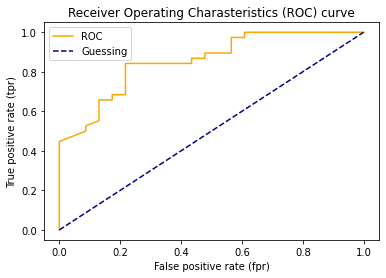

In [98]:
# Create a function for plotting ROC curves

import matplotlib.pyplot as plt

def plot_roc_curve(fpr,tpr):
  """
  Plots a ROC curve given the false positive rate (fpr)
  and true positive rate (tpr) of a model
  """
  # Plot roc curve
  plt.plot(fpr,tpr,color="orange",label="ROC")
  # Plot line with no predictive power (baseline)
  plt.plot([0,1],[0,1],color="darkblue",linestyle="--",label="Guessing")
  # Customize the plot
  plt.xlabel("False positive rate (fpr)")
  plt.ylabel("True positive rate (tpr)")
  plt.title("Receiver Operating Charasteristics (ROC) curve")
  plt.legend()
  plt.show()

plot_roc_curve(fpr,tpr)

In [99]:
from sklearn.metrics import roc_auc_score

roc_auc_score(Y_test,y_probs_positive)

0.8552631578947368

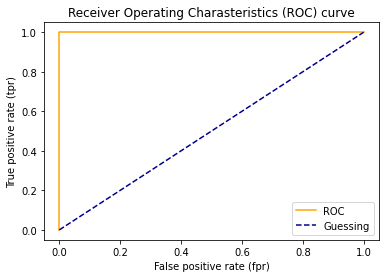

In [100]:
 # Plot perfect ROC curve and AUC score
 fpr , tpr , thresholds = roc_curve(Y_test,Y_test)

 plot_roc_curve(fpr,tpr)

In [101]:
# Perfect Auc Score
roc_auc_score(Y_test,Y_test)

1.0

# **Confusion Matrix**

A confusion matrix is a quick way to compare the labels a model predicts and the actual labels it was supposed to predict.
In essence giving you an idea of where the model is getting confused

In [102]:
from sklearn.metrics import confusion_matrix

y_preds = clf.predict(X_test)

confusion_matrix(Y_test,y_preds)

array([[18,  5],
       [ 7, 31]])

In [103]:
# Visualize confusion matrix with pd.crosstab()

pd.crosstab(Y_test,
             y_preds,
             rownames=["Actual labels"],
             colnames=["Predicted lables"])


Predicted lables,0,1
Actual labels,,
0,18,5
1,7,31


In [104]:
len(y_preds), 18+5+7+31

(61, 61)

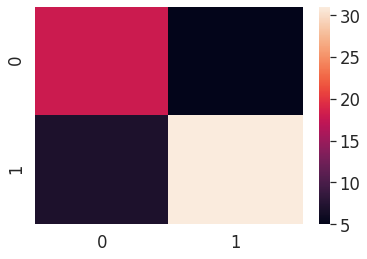

In [105]:
# Make our confusion matri more visual with Seaborns heatmap()
import seaborn as sns

# Set the font scale 
sns.set(font_scale=1.5)

# Create a confusion matrix
conf_mat = confusion_matrix(Y_test,y_preds)

# Plot it using Seaborn
sns.heatmap(conf_mat);


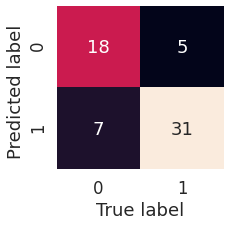

In [106]:
def plot_conf_mat(conf_mat):
  """
  Plots a confusion matrix using Seaborn's heatmap()
  """
  fig,ax = plt.subplots(figsize =(3,3) )
  ax = sns.heatmap(conf_mat,
                   annot=True, # Annotate the boxes with conf_mat info 
                   cbar=False # Heat map bar 
                   )
  
  plt.xlabel("True label")
  plt.ylabel("Predicted label ");

plot_conf_mat(conf_mat)

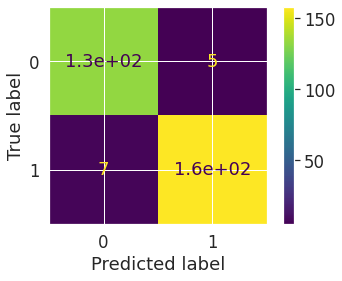

In [107]:
from sklearn.metrics import plot_confusion_matrix

plot_confusion_matrix(clf,X,Y);

# **Classification Report**

In [108]:
from sklearn.metrics import classification_report

print(classification_report(Y_test,y_preds))

              precision    recall  f1-score   support

           0       0.72      0.78      0.75        23
           1       0.86      0.82      0.84        38

    accuracy                           0.80        61
   macro avg       0.79      0.80      0.79        61
weighted avg       0.81      0.80      0.80        61



In [109]:
# Where precision and recall become valuable

disease_true = np.zeros(10000)
disease_true[0] = 1 # So only one positive case

disease_preds = np.zeros(10000) # Model predicts every case as 0

pd.DataFrame(classification_report(disease_true,
                                    disease_preds,
                                    output_dict=True))

/usr/local/lib/python3.6/dist-packages/sklearn/metrics/_classification.py:1272: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


,0.0,1.0,accuracy,macro avg,weighted avg
precision,0.99990,0.0,0.9999,0.499950,0.99980
recall,1.00000,0.0,0.9999,0.500000,0.99990
f1-score,0.99995,0.0,0.9999,0.499975,0.99985
support,9999.00000,1.0,0.9999,10000.000000,10000.00000


# To summarize classification metrics

---

- **Accuracy** is a good measure to start with if all classes are balanced (e.g same amount of samples which are labeled 0 or 1
- **Precision** and **recall** become more important when classes are imbalanced
- if false positive predictions are worse than false negatives aim for higher precision
- if false negative predictions are worse than false positives,aim for higher recall.
- **F1-score** is a combination of precision and recall


# **4.2.2 Regression Model Evaluation Metrics**

1. R^2 (Pronounced r-squared) or coefficient of determination
2. Mean absolute error (MAE)
3. Mean squared error (MSE)



# R^2 

What R^2 does:Compares your models predictions to the mean of the targets.Values can range from negative infinity to 1.If all your model does is predict the mean of the targets,it's R^2 value would be 0.And if your model perfectly predicts a range of numbers its R^2 value would be 1.

In [110]:
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = boston_df.drop("target",axis=1)
Y = boston_df["target"]

X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.2)

model = RandomForestRegressor().fit(X_train,Y_train)

model.score(X_test,Y_test)

0.873969014117403

In [111]:
from sklearn.metrics import r2_score

# Fill an array with y_test mean
y_test_mean = np.full(len(Y_test), Y_test.mean())

Y_test.mean()

21.488235294117654

In [112]:
r2_score(Y_test,y_test_mean)

2.220446049250313e-16

In [113]:
r2_score(Y_test,Y_test)

1.0

# **Mean ablsolute error (MAE)**

MAE is the average of the absolute differnces between predictions and actual values. It gives you an idea of how wrong your model predictions are



In [114]:
from sklearn.metrics import mean_absolute_error

y_preds = model.predict(X_test)

mae = mean_absolute_error(Y_test,y_preds)
mae

2.1226372549019623

In [115]:
df = pd.DataFrame(data={"actual values":Y_test,
                        "predicted values":y_preds})

df["differences"] = df["predicted values"] - df["actual values"]
df

,actual values,predicted values,differences
173,23.6,23.002,-0.598
274,32.4,30.826,-1.574
491,13.6,16.734,3.134
72,22.8,23.467,0.667
452,16.1,16.853,0.753
...,...,...,...
412,17.9,13.030,-4.870
436,9.6,12.490,2.890
411,17.2,13.406,-3.794
86,22.5,20.219,-2.281


# **Mean squared error (MSE)**



In [116]:
from sklearn.metrics import mean_squared_error

y_preds = model.predict(X_test)

mse = mean_squared_error(Y_test,y_preds)
mse

9.242328990196082

In [117]:
# Calculate MSE by hand

squared = np.square(df["differences"])
squared.mean()

9.24232899019608

# **4.2.3 Finnaly using the scoring parameter**

In [118]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

X = heart_diesease.drop("target",axis=1)
Y = heart_diesease["target"]

X_train,X_test, Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

clf = RandomForestClassifier()

In [119]:
np.random.seed(42)
cv_acc = cross_val_score(clf,X,Y,cv=5,scoring=None)
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [120]:
# Cross validated accuracy

print(f' The cross validated accuracy is: {np.mean(cv_acc)*100:.2f}% ')

 The cross validated accuracy is: 82.48% 


In [121]:
np.random.seed(42)
cv_acc = cross_val_score(clf,X,Y,cv=5,scoring="accuracy")
cv_acc

array([0.81967213, 0.90163934, 0.83606557, 0.78333333, 0.78333333])

In [122]:
print(f' The cross validated accuracy is: {np.mean(cv_acc)*100:.2f}% ')

 The cross validated accuracy is: 82.48% 


In [123]:
# Precision
cv_precision = cross_val_score(clf,X,Y,cv=5,scoring='precision')
np.mean(cv_precision)

0.8085601538512754

In [124]:
cv_recall = cross_val_score(clf,X,Y,cv=5,scoring="recall")
np.mean(cv_recall)

0.8424242424242424

In [125]:
cv_f1 = cross_val_score(clf,X,Y,scoring="f1")
np.mean(cv_f1)

0.841476533416832

In [126]:
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor

np.random.seed(42)

X = boston_df.drop("target",axis=1)
Y = boston_df["target"]

model = RandomForestRegressor()

In [127]:
np.random.seed(42)

cv_r2 = cross_val_score(model,X,Y,cv=5,scoring=None)
np.mean(cv_r2)

0.622375083951403

In [128]:
np.random.seed(42)

cv_r2 = cross_val_score(model,X,Y,cv=5,scoring="r2")
np.mean(cv_r2)

0.622375083951403

In [129]:
# Mean absolute error

cv_mae = cross_val_score(model,X,Y,cv=5,scoring="neg_mean_absolute_error")
np.mean(cv_mae)

-2.9961217433508045

In [130]:
# Mean squared error
cv_mse = cross_val_score(model,X,Y,cv=5,scoring="neg_mean_squared_error")
np.mean(cv_mse)

-21.02253826604542

# **4.3 Using Different Evaluation metrics as Scikit-Learn functions**


**Classification evaluation functions**

In [131]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split

np.random.seed(42)

X = heart_diesease.drop("target",axis=1)
Y = heart_diesease["target"]

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.2)

clf = RandomForestClassifier()
clf.fit(X_train,Y_train)

# Make some predictions
y_preds = clf.predict(X_test)

# Evaluate the classifier
print(f'Classifier metrics on the test set')
print(f'Accuracy: {accuracy_score(Y_test,y_preds)*100:.2f}% ')
print(f'Precision: {precision_score(Y_test,y_preds)*100:.2f}%')
print(f'Recall: {recall_score(Y_test,y_preds)*100:.2f}%')
print(f'F1: {f1_score(Y_test,y_preds)*100:.2f}%')


Classifier metrics on the test set
Accuracy: 85.25% 
Precision: 84.85%
Recall: 87.50%
F1: 86.15%


# **Regression evaluation Functions**

In [132]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

np.random.seed(42)

X = boston_df.drop("target",axis=1)
Y = boston_df["target"]

X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size= 0.2)

model = RandomForestRegressor().fit(X_train,Y_train)

# Make predictions using our regression model
y_preds = model.predict(X_test)

# Evaluate the regression model 
print(f'Regression model metrics on the test set')
print(f' R^2 score: {r2_score(Y_test,y_preds)} ')
print(f' MAE score: {mean_absolute_error(Y_test,y_preds)} ')
print(f' MSE score: {mean_squared_error(Y_test,y_preds)} ')

Regression model metrics on the test set
 R^2 score: 0.8739690141174031 
 MAE score: 2.1226372549019623 
 MSE score: 9.242328990196082 


# **5 Imporving a model**


---
- First predictions = baseline predictions.
- First model = baseline model.

From a data perspective:
 * Could we collect more data ? (generally,the more data the better)
 * Could we impore our data? 

From a model perspective:
* Is there a better model we could use?
* Could we improve the current model? 

Hyperparameters vs Parameters
* Parameters = model finds these patterns in data
* Hyperparameters = Settings on a model you can adjust to (potentially) imporve its ability to find patterns

In [133]:
from sklearn.ensemble import RandomForestClassifier

clf = RandomForestClassifier()

In [134]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

**Three ways to adjust hyperparameters**
1. By hand
2. Randomly with RandomSearchCV
3. Exhaustly with GridSearchCV

# **5.1 Turning Hyperparameters by hand**



---

We will make 3 sets : training,validation and test

In [135]:
clf.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

We are goint to try and adjust:

- max_depth
- max_features
- min_samples_leaf
- min_samples_split
- n_estimators


In [136]:
def evaluate_preds(y_true,y_preds):
  """
  Performs evaluation comparison on y_true labels vs y_pred labels
  on a classification
  """
  accuracy = accuracy_score(y_true,y_preds)
  precision = precision_score(y_true,y_preds)
  recall = recall_score(y_true,y_preds)
  f1 = f1_score(y_true,y_preds)
  metric_dict = {"accuracy":round(accuracy ,2),
                 "precision":round(precision,2),
                 "recall":round(recall,2),
                 "f1":round(f1,2)}
                 
  print(f'Accuracy: {accuracy *100:.2f}% ')
  print(f'Precision: {precision *100:.2f}%')
  print(f'Recall: {recall *100:.2f}%')
  print(f'F1: {f1 *100:.2f}%')
  
  return metric_dict

In [137]:
heart_diesease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [138]:
from sklearn.ensemble import RandomForestClassifier

np.random.seed(42)

# Shuffle the data

heart_diesease_shuffled = heart_diesease.sample(frac=1)

# Split into X and Y
X = heart_diesease_shuffled.drop("target",axis=1)
Y = heart_diesease_shuffled["target"]

# Split the data into train , validation , test sets

train_split = round(0.7 * (len(heart_diesease_shuffled))) # 70 % of data
valid_split = round(train_split + 0.15 * len(heart_diesease_shuffled)) # 15% of data

X_train,Y_train = X[:train_split],Y[:train_split]
X_valid,Y_valid = X[train_split:valid_split],Y[train_split:valid_split]
X_test,Y_test = X[valid_split:],Y[valid_split:]

len(X_train),len(X_valid),len(X_test),len(heart_diesease_shuffled)

(212, 45, 46, 303)

In [139]:
# Make the model
clf = RandomForestClassifier()
clf.fit(X_train,Y_train)

# Make base line predictions 
y_preds = clf.predict(X_valid)

# Evaluate the classifier on validation set
baseline_metrics = evaluate_preds(Y_valid,y_preds)
baseline_metrics

Accuracy: 82.22% 
Precision: 81.48%
Recall: 88.00%
F1: 84.62%


{'accuracy': 0.82, 'f1': 0.85, 'precision': 0.81, 'recall': 0.88}

In [140]:
# Chaning n_estimators on a model
np.random.seed(42)

# Create a second classifier with different hyperparameters

clf_2 = RandomForestClassifier(n_estimators=100)
clf_2.fit(X_train,Y_train)

# Make predictions with different hyperparameters
y_preds_2 = clf_2.predict(X_valid)

# Evaluate the 2nd classifier
clf_2_metrics = evaluate_preds(Y_valid,y_preds_2)
clf_2_metrics

Accuracy: 82.22% 
Precision: 84.00%
Recall: 84.00%
F1: 84.00%


{'accuracy': 0.82, 'f1': 0.84, 'precision': 0.84, 'recall': 0.84}

In [141]:
# Chaning max_depth on a model
np.random.seed(42)


clf_3 = RandomForestClassifier(n_estimators=100,
                               max_depth=10)
clf_3.fit(X_train,Y_train)

# Make predictions with differnt hyperparameters
y_preds_3 = clf_3.predict(X_valid)

# Evaluate the 3rd classifier
clf_3_metrics = evaluate_preds(Y_valid,y_preds_3)
clf_3_metrics

Accuracy: 80.00% 
Precision: 80.77%
Recall: 84.00%
F1: 82.35%


{'accuracy': 0.8, 'f1': 0.82, 'precision': 0.81, 'recall': 0.84}

**Turing hyperparameters by hand will take a lot of work and a lot of trial and error**

# **5.2 Hyperparameter turing with RandomizedSearchCV**

In [142]:
from sklearn.model_selection import RandomizedSearchCV


grid = {"n_estimators":[10,100,200,500,1000,1200],
        "max_depth":[None,5,10,20,30],
        "max_features":["auto","sqrt"],
        "min_samples_split":[2,4,6],
        "min_samples_leaf":[1,2,4]}

np.random.seed(42)

# Split into X and Y
X = heart_diesease_shuffled.drop("target",axis=1)
Y = heart_diesease_shuffled["target"]

# Split into train and test sets
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.2)

# Instantiate RandomForestClassifier

clf = RandomForestClassifier(n_jobs=-1)


# Setup RandomizedSearchCV
rs_clf = RandomizedSearchCV(estimator=clf,
                            param_distributions = grid,
                            n_iter=10, #Number of models to try
                            cv = 5,
                            verbose = 2)

# Fit the RandomizedSearchCV version of clf
rs_clf.fit(X_train,Y_train);

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   2.8s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    2.8s remaining:    0.0s


[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.9s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.9s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.9s
[CV] n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5 
[CV]  n_estimators=1200, min_samples_split=6, min_samples_leaf=2, max_features=sqrt, max_depth=5, total=   1.9s
[CV] n_estimators=100, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=30 
[CV]  n_estimators=100, min_samples_split=4, min_samples_leaf=2, max_features=auto, max_depth=30, total=   0.3s
[CV] n_estimators=100, min_samples_split=4, min_samp

[Parallel(n_jobs=1)]: Done  50 out of  50 | elapsed:   31.9s finished


In [143]:
rs_clf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 2,
 'min_samples_split': 6,
 'n_estimators': 200}

In [144]:
# 10 n_iter 
# {'max_depth': None,
#  'max_features': 'sqrt',
#  'min_samples_leaf': 2,
#  'min_samples_split': 6,
#  'n_estimators': 200}
# 180 n_iter 
# {'max_depth': 20,
#  'max_features': 'sqrt',
#  'min_samples_leaf': 4,
#  'min_samples_split': 6,
#  'n_estimators': 200}

# Make predictions with the best hyperparameters
rs_y_preds = rs_clf.predict(X_test)

# Evaluate the predictions
rs_metrics = evaluate_preds(Y_test,rs_y_preds)

Accuracy: 81.97% 
Precision: 77.42%
Recall: 85.71%
F1: 81.36%


# **5.3 Hyperparameter tuning with GridSearchCv**

In [145]:
grid

{'max_depth': [None, 5, 10, 20, 30],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 4, 6],
 'n_estimators': [10, 100, 200, 500, 1000, 1200]}

In [146]:
grid_2 = {'max_depth': [None, 20],
          'max_features': ['auto', 'sqrt'],
          'min_samples_leaf': [1, 2],
          'min_samples_split': [6],
          'n_estimators': [100, 200, 500]}

In [147]:
from sklearn.model_selection import GridSearchCV,train_test_split

np.random.seed(42)

# Split into X and Y
X = heart_diesease_shuffled.drop("target",axis=1)
Y = heart_diesease_shuffled["target"]

# Split into train and test sets
X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.2)

# Instantiate RandomForestClassifier

clf = RandomForestClassifier(n_jobs=-1)


# Setup GridSearchCV
gs_clf = GridSearchCV(estimator=clf,
                            param_grid= grid_2,
                            cv = 5,
                            verbose = 2)

# Fit the GridSearchCV version of clf
gs_clf.fit(X_train,Y_train);

Fitting 5 folds for each of 24 candidates, totalling 120 fits
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.3s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.3s remaining:    0.0s


[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.3s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.3s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.3s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=100, total=   0.3s
[CV] max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200 
[CV]  max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=6, n_estimators=200, total=   0.4s
[CV] max_depth=None, max_features=

[Parallel(n_jobs=1)]: Done 120 out of 120 | elapsed:   58.9s finished


In [148]:
gs_clf.best_params_

{'max_depth': None,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 6,
 'n_estimators': 200}

In [149]:
gs_y_preds = gs_clf.predict(X_test)

# Evaluate the predictions
gs_metrics = evaluate_preds(Y_test,gs_y_preds)  

Accuracy: 80.33% 
Precision: 75.00%
Recall: 85.71%
F1: 80.00%


**Lets compare our different model metrics**

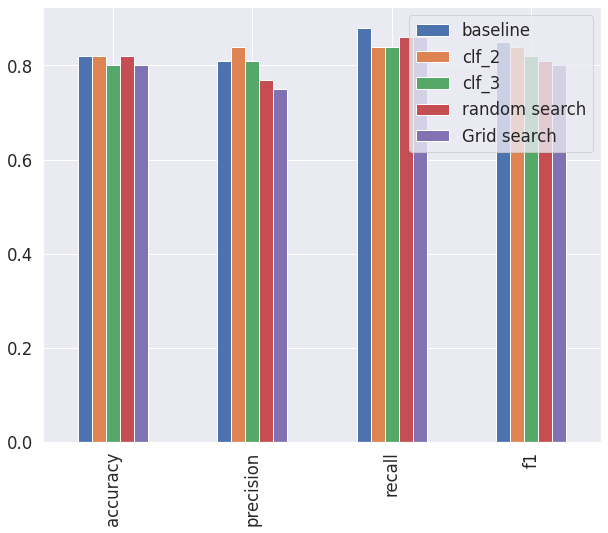

In [150]:
compare_metrics = pd.DataFrame({"baseline":baseline_metrics,
                                "clf_2":clf_2_metrics,
                                "clf_3":clf_3_metrics,
                                "random search":rs_metrics,
                                "Grid search":gs_metrics})

compare_metrics.plot.bar(figsize=(10,8));

# **6. Saving and loading trained machine learning models**

---
Two ways to save and load machine learning models:
1. With pythons pcikle module
2. With the joblib module



 **Pickle module**

In [151]:
import pickle

# Save an existing model to a file

pickle.dump(gs_clf,open("/content/drive/MyDrive/machine_learning/pkl_models/gs_random_forest_model_1.pkl","wb"))

In [152]:
# Load a saved model
loaded_pickle_model = pickle.load(open("/content/drive/MyDrive/machine_learning/pkl_models/gs_random_forest_model_1.pkl","rb"))

In [153]:
# Make some predictions

pickle_y_preds = loaded_pickle_model.predict(X_test)

evaluate_preds(Y_test,pickle_y_preds);

Accuracy: 80.33% 
Precision: 75.00%
Recall: 85.71%
F1: 80.00%


**Joblib Module**

In [154]:
from joblib import dump,load

# Save model to file 
dump(gs_clf,filename="/content/drive/MyDrive/machine_learning/Joblib_models/gs_random_forest_model_1.joblib")


['/content/drive/MyDrive/machine_learning/Joblib_models/gs_random_forest_model_1.joblib']

In [155]:
# Import a saved joblib model
loaded_job_model = load(filename="/content/drive/MyDrive/machine_learning/Joblib_models/gs_random_forest_model_1.joblib")


In [156]:
# Make some predictions
joblib_y_preds = loaded_job_model.predict(X_test)

evaluate_preds(Y_test,joblib_y_preds);

Accuracy: 80.33% 
Precision: 75.00%
Recall: 85.71%
F1: 80.00%


# **7. Putting it all together**

In [157]:
data = pd.read_csv("/content/drive/MyDrive/machine_learning/data/car-sales-extended-missing-data.csv")
data

,Make,Colour,Odometer (KM),Doors,Price
0,Honda,White,35431.0,4.0,15323.0
1,BMW,Blue,192714.0,5.0,19943.0
2,Honda,White,84714.0,4.0,28343.0
3,Toyota,White,154365.0,4.0,13434.0
4,Nissan,Blue,181577.0,3.0,14043.0
...,...,...,...,...,...
995,Toyota,Black,35820.0,4.0,32042.0
996,NaN,White,155144.0,3.0,5716.0
997,Nissan,Blue,66604.0,4.0,31570.0
998,Honda,White,215883.0,4.0,4001.0


In [158]:
data.dtypes

Make              object
Colour            object
Odometer (KM)    float64
Doors            float64
Price            float64
dtype: object

In [159]:
data.isna().sum()

Make             49
Colour           50
Odometer (KM)    50
Doors            50
Price            50
dtype: int64

**Steps we have to do:**
1. Fill missing data
2. Convert data into numbers
3. Build a model on the data

In [164]:
# Getting data ready
import pandas as pd
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder

# Modelling
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split,GridSearchCV

# Setup random seed
import numpy as np
np.random.seed(42)

# Import data and drop rows with missing labels
data = pd.read_csv("/content/drive/MyDrive/machine_learning/data/car-sales-extended-missing-data.csv")
data.dropna(subset=["Price"],inplace=True)

# Define different features and transformer pipeline
categorical_features = ["Make","Colour"]
categorical_transformer = Pipeline(steps =[
                                   ("imputer",SimpleImputer(strategy="constant",fill_value="missing")),
                                    ("onehot",OneHotEncoder(handle_unknown="ignore"))])

door_feature = ["Doors"]
door_transformer = Pipeline(steps=[
                            ("imputer",SimpleImputer(strategy="constant",fill_value=4))])

numeric_features = ["Odometer (KM)"]
numeric_transformer = Pipeline(steps=[
                              ("imputer",SimpleImputer(strategy="mean"))])

# Set up pre-proccesing steps (Fill missing values and then convert to numbers)

preprocessor = ColumnTransformer(
    transformers=[
     ("cat",categorical_transformer,categorical_features),
     ("door",door_transformer,door_features),
     ("num",numeric_transformer,num_features)   
    ])

# Creating a preprocessing and modelling pipeline
model = Pipeline(steps=[("prepprocessor",preprocessor),
                        ("model",RandomForestRegressor())])

# Split data
X = data.drop("Price",axis=1)
Y = data["Price"]

X_train,X_test,Y_train,Y_test = train_test_split(X,Y, test_size=0.2)

# Fit and score the model
model.fit(X_train,Y_train)

model.score(X_test,Y_test)

0.22188417408787875

**It is also possible to use GridSearchCV or RandomizedSearchCV with our pipeline**

In [178]:
# Use GridSearchCV with our regression Pipeline
from sklearn.model_selection import GridSearchCV

pipe_grid = {
    "preprocessor__num__imputer__strategy": ["mean", "median"],
    "model__n_estimators": [100, 1000],
    "model__max_depth": [None, 5],
    "model__max_features": ["auto"],
    "model__min_samples_split": [2, 4]    
}

gs_model = GridSearchCV(model, pipe_grid, cv=5, verbose=2, n_jobs=-1)
#gs_model.fit(X_train,Y_train)